Installing tensorflow dependency

In [1]:
# Watch out: installing tensorflow or numpy might take time. A lot of time
%pip install tensorflow
%pip install "numpy<2"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [3]:
with open("preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val   = data["X_val"]
X_test  = data["X_test"]
y_train = data["y_train"]
y_val   = data["y_val"]
y_test  = data["y_test"]


# Convert to numpy arrays
X_train_np = X_train.values
X_val_np   = X_val.values
X_test_np  = X_test.values


In [4]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),

    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

/home/daniel/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [6]:
history = model.fit(
    X_train_np, y_train,
    validation_data=(X_val_np, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0144 - mae: 0.0891 - val_loss: 0.0120 - val_mae: 0.0834
Epoch 2/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0120 - mae: 0.0803 - val_loss: 0.0118 - val_mae: 0.0834
Epoch 3/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0115 - mae: 0.0781 - val_loss: 0.0116 - val_mae: 0.0780
Epoch 4/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0094 - mae: 0.0696 - val_loss: 0.0098 - val_mae: 0.0745
Epoch 41/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0094 - mae: 0.0695 - val_loss: 0.0100 - val_mae: 0.0758
Epoch 42/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0094 - mae: 0.0695 - val_loss: 0.0099 - val_mae: 0.0732
Epoch 43/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0094 - mae: 0.0695 - val_loss: 0.0099 - val_mae: 0.0744
Epoch 44/100
7790/7790 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0094 - mae: 0.0694 - val_loss: 0.0102 - val_mae: 0.0752


In [7]:
preds = model.predict(X_test_np).flatten()

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print(f"DNN RMSE: {rmse:.4f}")

6677/6677 ━━━━━━━━━━━━━━━━━━━━ 5s 719us/step
DNN RMSE: 0.0958


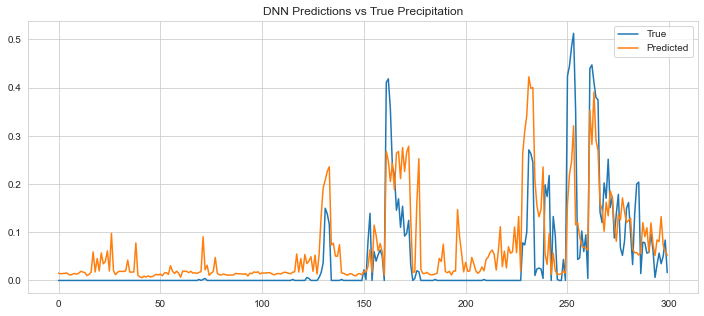

In [8]:
plt.figure(figsize=(12,5))
plt.plot(y_test[:300], label="True")
plt.plot(preds[:300], label="Predicted")
plt.title("DNN Predictions vs True Precipitation")
plt.legend()
plt.show()


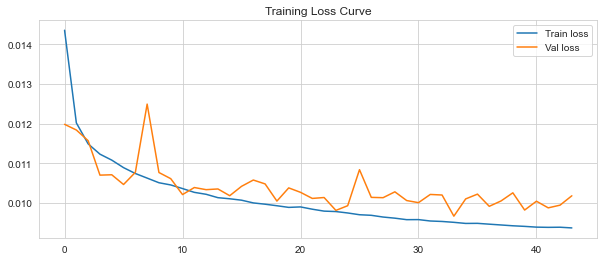

In [9]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Training Loss Curve")
plt.legend()
plt.show()